In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
Y_train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X=Y_train.drop(columns='label')
Y=Y_train['label']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

print(X_test.shape,Y_test.shape)

(8400, 784) (8400,)


Text(0.5, 1.0, '6')

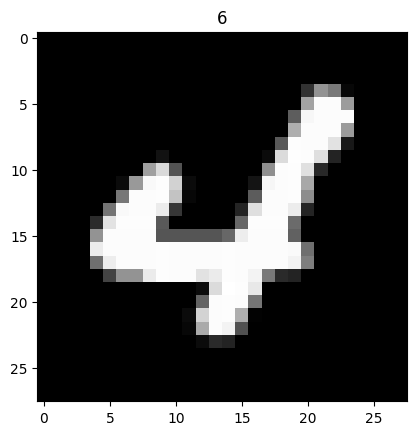

In [40]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline
i=500
img=X_train.iloc[i].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(Y_train[i])

In [41]:
# from tensorflow.keras.optimizers import SGD
# import matplotlib.pyplot as plt
# new_SGD = SGD(learning_rate = 0.0001)        
# model.compile(
#     optimizer=new_SGD,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy'] 
# )


# model.fit(
#     X_train, Y_train.values.ravel(),
#     validation_data=(X_test, Y_test),
#     batch_size=256,
#     epochs=100,
#     verbose=0,
# )

# loss, accuracy = model.evaluate(X_test, Y_test)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

K-nn

In [42]:

# error_rate = []


MLP

K_Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier

# สร้างฟังก์ชันสร้างโมเดล Keras
def create_model_mlp():
    model = Sequential([
        layers.Dense(1024, activation='relu', input_shape=[784]),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax'),
    ])
    new_SGD = SGD(learning_rate=0.0001)        
    model.compile(
        optimizer=new_SGD,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'] 
    )
    return model


# สร้างตัวแปรที่มี KerasClassifier จากฟังก์ชันสร้างโมเดล
model_mlp = KerasClassifier(build_fn=create_model_mlp, epochs=10, batch_size=10, verbose=0)

/tmp/ipykernel_32/362557793.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_mlp = KerasClassifier(build_fn=create_model_mlp, epochs=10, batch_size=10, verbose=0)


In [44]:
# สร้างโมเดล KNeighborsClassifier
model_knn1 = KNeighborsClassifier(n_neighbors=1)  # จำนวนเพื่อบ้าน
model_knn2 = KNeighborsClassifier(n_neighbors=2)
model_knn3 = KNeighborsClassifier(n_neighbors=3)
model_knn4 = KNeighborsClassifier(n_neighbors=4)
model_knn5 = KNeighborsClassifier(n_neighbors=5)
model_knn6 = KNeighborsClassifier(n_neighbors=6)

# ทำ Cross Validation
# mlp_scores = cross_val_score(model_mlp, X, Y, cv=10, scoring='accuracy')
# print("MLP scores:", mlp_scores)

# ทำ Cross Validation
knn_scores1 = cross_val_score(model_knn1, X, Y, cv=10, scoring='accuracy')
print("KNN scores1:", knn_scores1)
knn_scores2 = cross_val_score(model_knn2, X, Y, cv=10, scoring='accuracy')
print("KNN scores2:", knn_scores2)
knn_scores3 = cross_val_score(model_knn3, X, Y, cv=10, scoring='accuracy')
print("KNN scores3:", knn_scores3)
knn_scores4 = cross_val_score(model_knn4, X, Y, cv=10, scoring='accuracy')
print("KNN scores4:", knn_scores4)
knn_scores5 = cross_val_score(model_knn5, X, Y, cv=10, scoring='accuracy')
print("KNN scores5:", knn_scores5)
knn_scores6 = cross_val_score(model_knn6, X, Y, cv=10, scoring='accuracy')
print("KNN scores6:", knn_scores6)

KNN scores1: [0.97       0.9647619  0.96952381 0.96904762 0.96785714 0.9602381
 0.9652381  0.97261905 0.96619048 0.96857143]
KNN scores2: [0.96166667 0.96214286 0.96285714 0.96380952 0.95952381 0.95904762
 0.96214286 0.96142857 0.96404762 0.96214286]
KNN scores3: [0.97404762 0.96904762 0.96880952 0.96904762 0.96833333 0.96166667
 0.96404762 0.96904762 0.9702381  0.96880952]
KNN scores4: [0.97166667 0.96428571 0.96809524 0.96857143 0.96857143 0.96190476
 0.96357143 0.96595238 0.9702381  0.96952381]
KNN scores5: [0.97190476 0.96785714 0.96666667 0.96785714 0.96642857 0.96190476
 0.96452381 0.96571429 0.97261905 0.96833333]
KNN scores6: [0.97214286 0.96619048 0.96666667 0.96833333 0.96452381 0.96380952
 0.96333333 0.965      0.9702381  0.96690476]


In [45]:
from sklearn.neighbors import NearestCentroid
centroid_model = NearestCentroid()
centroid_scores = cross_val_score(centroid_model, X, Y, cv=10)  
print("Cross-validated scores:", centroid_scores)

Cross-validated scores: [0.81880952 0.80952381 0.80690476 0.79857143 0.80880952 0.80333333
 0.81619048 0.80071429 0.81095238 0.81333333]


In [46]:
print("ความแม่นยำ MLP_Model:",(sum(mlp_scores)/len(mlp_scores))*100,"%")
print("ความแม่นยำ KNN_Model1:",(sum(knn_scores1)/len(knn_scores1))*100,"%")
print("ความแม่นยำ KNN_Model2:",(sum(knn_scores2)/len(knn_scores2))*100,"%")
print("ความแม่นยำ KNN_Model3:",(sum(knn_scores3)/len(knn_scores3))*100,"%")
print("ความแม่นยำ KNN_Model4:",(sum(knn_scores4)/len(knn_scores4))*100,"%")
print("ความแม่นยำ KNN_Model5:",(sum(knn_scores5)/len(knn_scores5))*100,"%")
print("ความแม่นยำ KNN_Model6:",(sum(knn_scores6)/len(knn_scores6))*100,"%")

print("ความแม่นยำ Centroid_Model:",(sum(centroid_scores)/len(centroid_scores))*100,"%")

ความแม่นยำ MLP_Model: 89.28095238095237 %
ความแม่นยำ KNN_Model1: 96.74047619047619 %
ความแม่นยำ KNN_Model2: 96.18809523809524 %
ความแม่นยำ KNN_Model3: 96.8309523809524 %
ความแม่นยำ KNN_Model4: 96.72380952380955 %
ความแม่นยำ KNN_Model5: 96.73809523809526 %
ความแม่นยำ KNN_Model6: 96.67142857142856 %
ความแม่นยำ Centroid_Model: 80.87142857142857 %


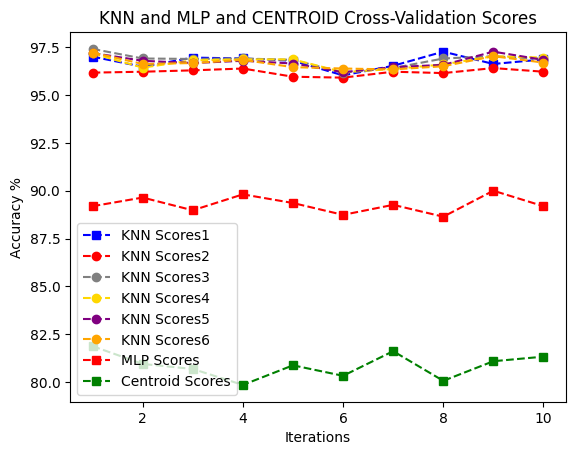

In [49]:
import matplotlib.pyplot as plt

# สร้างข้อมูลสำหรับกราฟ
iterations = range(1, 11)
# พล็อตกราฟสองเส้น
plt.plot(iterations, knn_scores1*100, marker='s', linestyle='--', color='b', label='KNN Scores1')
plt.plot(iterations, knn_scores2*100, marker='o', linestyle='--', color='r', label='KNN Scores2')
plt.plot(iterations, knn_scores3*100, marker='o', linestyle='--', color='grey', label='KNN Scores3')
plt.plot(iterations, knn_scores4*100, marker='o', linestyle='--', color='gold', label='KNN Scores4')
plt.plot(iterations, knn_scores5*100, marker='o', linestyle='--', color='purple', label='KNN Scores5')
plt.plot(iterations, knn_scores6*100, marker='o', linestyle='--', color='orange', label='KNN Scores6')
plt.plot(iterations, mlp_scores*100, marker='s', linestyle='--', color='r', label='MLP Scores')
plt.plot(iterations, centroid_scores*100, marker='s', linestyle='--', color='g', label='Centroid Scores')

# กำหนดตัวแปร
plt.title('KNN and MLP and CENTROID Cross-Validation Scores')
plt.xlabel('Iterations')
plt.ylabel('Accuracy %')
plt.legend()

# แสดงกราฟ
plt.show()